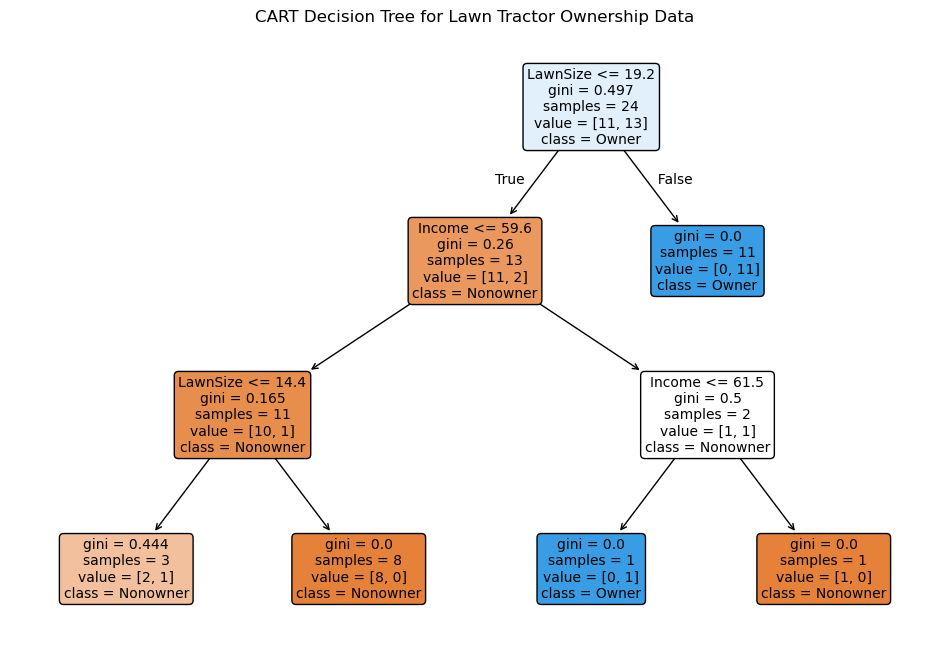

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 1. Load the dataset into a Pandas DataFrame
data = {
    'ID': list(range(1, 25)),
    'Income': [
        60, 75, 32.8, 64.3, 62.5, 57.6, 80.1, 84, 110.1, 12, 13, 30.2,
        32.8, 59.2, 82.8, 18.4, 69, 47.4, 53, 31, 51, 31, 20, 63
    ],
    'LawnSize': [
        18.4, 19.6, 14.8, 20.8, 21.6, 15.6, 20.8, 20.4, 23.6, 17.2, 17.6, 17.4,
        14, 14, 22.4, 18.4, 20, 16.4, 20.8, 18.8, 21, 14, 20, 14.8
    ],
    'Decision': [
        'Owner', 'Owner', 'Nonowner', 'Owner', 'Owner', 'Nonowner', 'Owner',
        'Owner', 'Owner', 'Nonowner', 'Nonowner', 'Nonowner', 'Owner',
        'Nonowner', 'Owner', 'Nonowner', 'Owner', 'Nonowner', 'Owner',
        'Nonowner', 'Owner', 'Nonowner', 'Owner', 'Nonowner'
    ]
}

df = pd.DataFrame(data)

# 2. Prepare features (X) and target (y)
# Drop the ID column as it is not a feature
X = df[['Income', 'LawnSize']]
y = df['Decision']

# Scikit-learn requires numerical targets, so encode 'Owner'/'Nonowner' to 0/1
le = LabelEncoder()
y_encoded = le.fit_transform(y)
# 0 = Nonowner, 1 = Owner

# 3. Initialize and Train the CART Model
# scikit-learn's DecisionTreeClassifier uses a modified CART algorithm by default
# We use Gini impurity as the criterion, consistent with the original CART methodology
clf = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=3) # Limit depth for clarity

clf.fit(X, y_encoded)

# 4. Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=['Income', 'LawnSize'],
    class_names=le.classes_, # Use original class names for readability
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("CART Decision Tree for Lawn Tractor Ownership Data")
plt.show()
